In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
import argparse


def get_args_xgboost():
    parser = argparse.ArgumentParser()
    parser.add_argument('--learning_rate', type=float, default=0.1, help='learning rate')
    parser.add_argument('--n_estimators', type=int, default=100, help='n_estimators')
    parser.add_argument('--max_depth', type=int, default=6, help='max_depth')
    parser.add_argument('--subsample', type=float, default=0.8, help='subsample')
    args = parser.parse_args([])
    return args

def load_dataset():
    data = pd.read_csv("./static/Housing 2.csv")
    return data

def process_dataset(data):
    column_non_tabular = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
    encoder = LabelEncoder()
    
    for column in column_non_tabular:
        data[column] = encoder.fit_transform(data[column])

    target = data["price"]
    data = data.drop(["price"], axis=1)
    
    x_train, x_val, y_train, y_val = train_test_split(data, target, test_size = 0.3, random_state = 42)
    
        
    return x_train, x_val, y_train, y_val

def create_xgboost(n_estimators: int, max_depth: int, learning_rate: float, subsample: float)-> XGBRegressor:
    """
    create the xgboost regressor model with hyperparameters
    
    Args:
        n_estimators (int):
        max_depth (int):
        learning_rate (float):
        subsample (float):
        
    Returns:
        xgb (XGBRegressor):
        
    
    """
    xgb = XGBRegressor(n_estimators= n_estimators, 
                       max_depth=max_depth, 
                       learning_rate=learning_rate, 
                       subsample=subsample)
    
    return xgb
    
    
def create_rfr(n_estimators: int, max_depth: int, min_samples_split: int, min_samples_leaf: int)-> RandomForestRegressor:
    """
    
    """
    rfr = RandomForestRegressor(n_estimators= n_estimators, 
                                max_depth= max_depth, 
                                min_samples_split= min_samples_split, 
                                min_samples_leaf= min_samples_leaf)
    
    return rfr


def main():
    args_xgb = get_args_xgboost()
    data = load_dataset()
    x_train, x_val, y_train, y_val = process_dataset(data)
    
    xgb = create_xgboost(n_estimators = args_xgb.n_estimators, 
                         max_depth = args_xgb.max_depth, 
                         learning_rate = args_xgb.learning_rate, 
                         subsample = args_xgb.subsample)  
    
    xgb.fit(x_train, y_train)

    pred_xgb = xgb.predict(x_val)
    # hpt = hypertune.HyperTune()
    
    # hpt.report_hyperparameter_tuning_metric(
    #     hyperparameter_metric_tag='R-squared (R²)',
    #     metric_value=r2_score(y_val, pred_xgb),)
    
if __name__ == '__main__':
    main()

# Data Visualisation

In [17]:
data = pd.read_csv("static/Housing 2.csv")
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
import script.utilities as utilities
import numpy as np


x_train, x_val, y_train, y_val= utilities.preprocess_data(data)

xgb = utilities.train_and_save_xgboost(x_train, x_val, y_train, y_val)

to_predict = {"area": 7420,
              "bedrooms": 4,
              "bathrooms": 2,
              "stories": 3,
              "mainroad": 1,
              "guestroom": 0,
              "basement": 0,
              "hotwaterheating": 0,
              "airconditioning": 1,
              "parking": 2,
              "prefarea": 1,
              "furnishingstatus": 1,
              "total_room": 6,
              "mean_dimension_room": 1200}

to_predict = pd.DataFrame([to_predict])
print(to_predict)

int(utilities.make_prediction(to_predict, xgb))

mainroad
Mapping des valeurs encodées et des labels : {0: 0, 1: 1}
guestroom
Mapping des valeurs encodées et des labels : {0: 0, 1: 1}
basement
Mapping des valeurs encodées et des labels : {0: 0, 1: 1}
hotwaterheating
Mapping des valeurs encodées et des labels : {0: 0, 1: 1}
airconditioning
Mapping des valeurs encodées et des labels : {0: 0, 1: 1}
prefarea
Mapping des valeurs encodées et des labels : {0: 0, 1: 1}
furnishingstatus
Mapping des valeurs encodées et des labels : {0: 0, 1: 1, 2: 2}
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
0                0                1        2         1                 1   

   total_room  mean_dimension_room  
0           6                 1200  


/var/folders/vc/kyc23w1d2xv71xlg1pxxvq580000gn/T/ipykernel_98091/1801173800.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(utilities.make_prediction(to_predict, xgb))


8601087

In [81]:
# no missing values

data.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [ ]:
def preprocess_data(data: pd.DataFrame)->pd.DataFrame:
    """ 
        Function to preprocess the dataset before training model
        
        Args:
            data (pd.DataFrame):
                the pandas dataframe we want to preprocess
                
        Returns:
            data (pd.DataFrame):
                the dataframe preprocessed
                
        Raise:
            - ValueType Error
            - if data is not pd.DataFrame
    
    """
    if not isinstance(data, pd.DataFrame):
        raise TypeError(f"wrong type for data, expected pd.DataFrame got {type(data).__name__}")
    
    column_non_tabular = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
    
    encoder = LabelEncoder()

    for column in column_non_tabular:
        data[column] = encoder.fit_transform(data[column])
        
    # add a column for total room and mean dimension size room

    data["total_room"]          = data["bedrooms"] + data["bathrooms"] + data["guestroom"] + data["basement"]
    data["mean_dimension_room"] = data["area"] / data["total_room"]
    data["mean_dimension_room"] = data["mean_dimension_room"].apply(lambda x: round(x))
    
    # X and y
    price = data["price"]
    train = data.drop(["price"], axis= 1)

    # Normalize
    norm = MinMaxScaler()
    #train = norm.fit_transform(train)

    # split
    x_train, x_val, y_train, y_val = train_test_split(train, price, test_size = 0.3, random_state = 42)
    

        
    

# Labelize

In [82]:
column_non_tabular = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
encoder = LabelEncoder()

for column in column_non_tabular:
    data[column] = encoder.fit_transform(data[column])
    
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# Feature engineering

In [16]:
# add a column for total room and mean dimension size room

data["total_room"]          = data["bedrooms"] + data["bathrooms"] + data["guestroom"] + data["basement"]
data["mean_dimension_room"] = data["area"] / data["total_room"]
data["mean_dimension_room"] = data["mean_dimension_room"].apply(lambda x: round(x))
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_room,mean_dimension_room
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,6,1237
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,8,1120
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,6,1660
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,7,1071
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,7,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,4,750
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,600
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,3,1207
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,4,728


# Correlation matrix

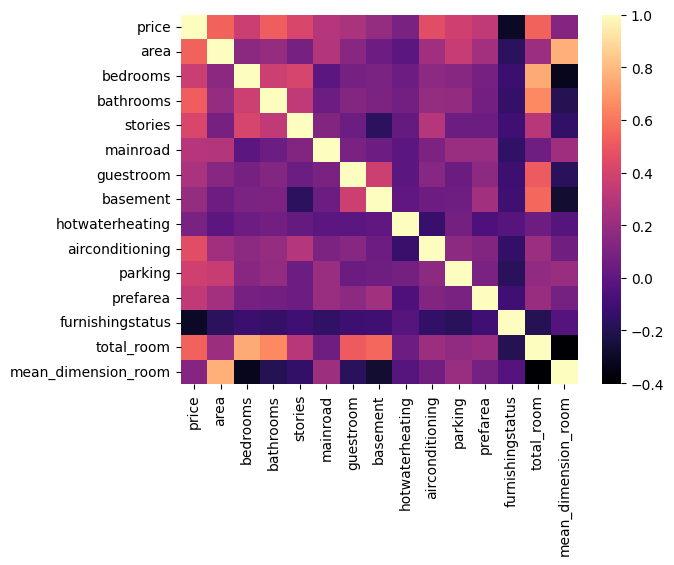

In [19]:
correlation = data.corr()
sb.heatmap(correlation, cmap = 'magma')
plt.show()

# Histogram

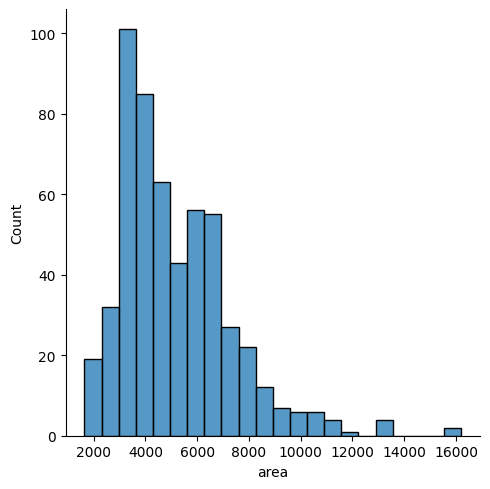

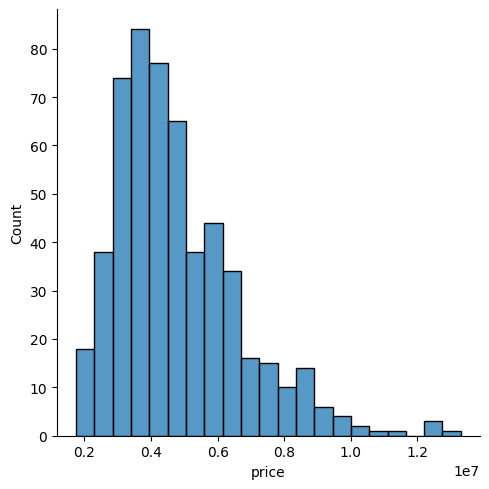

In [61]:
sb.displot(data, x="area")
sb.displot(data, x="price")


Text(0.5, 1.0, 'histogram hotwaterheating')

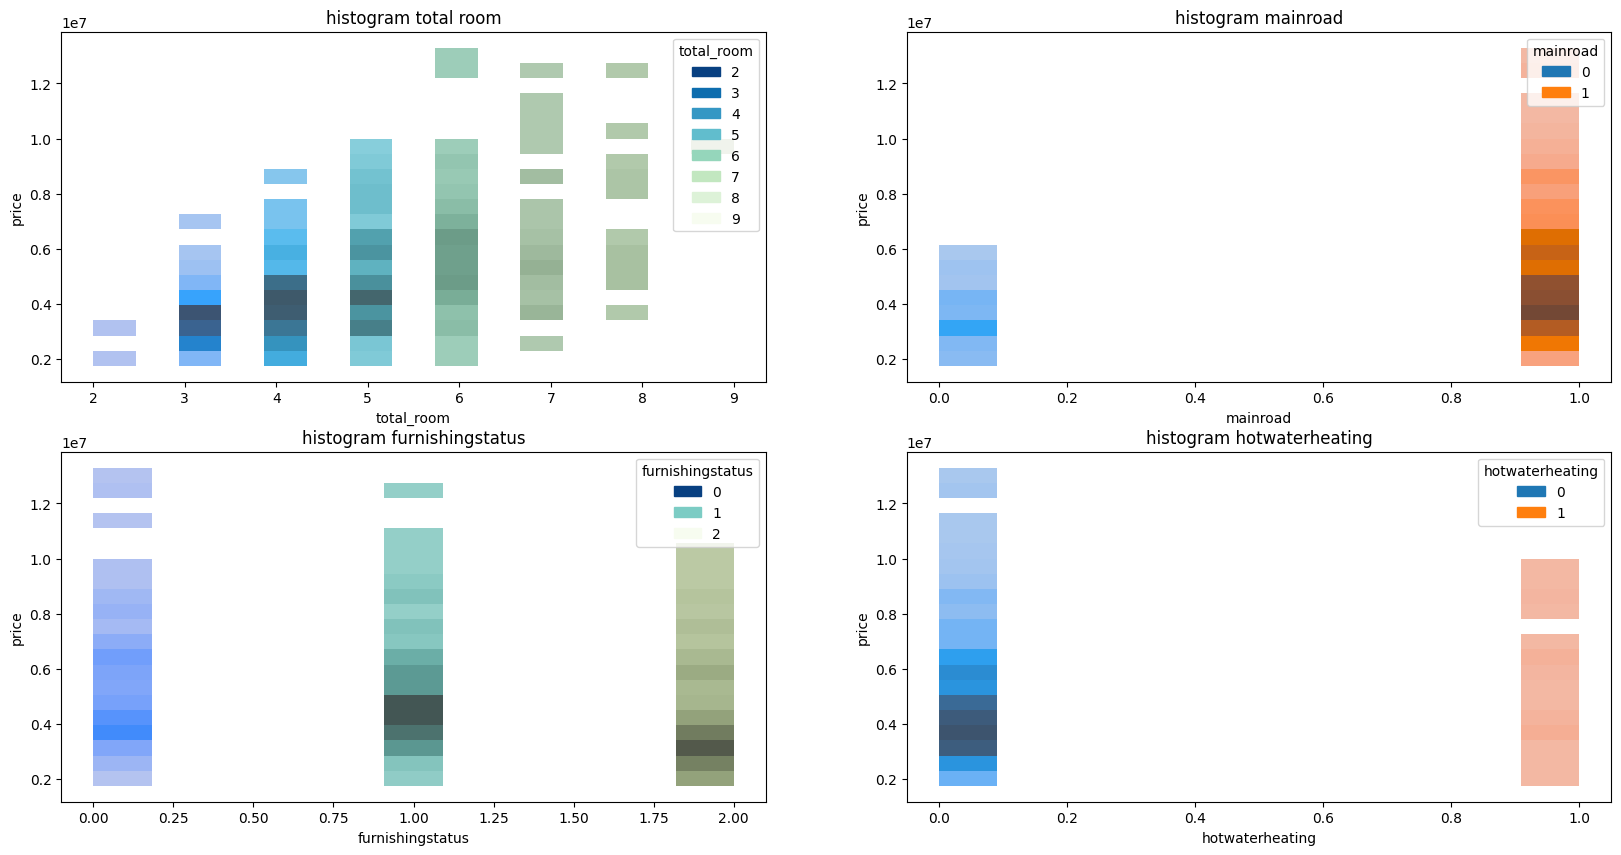

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

ax = sb.histplot(data, x="total_room", y="price", hue="total_room",  palette= plt.get_cmap("GnBu_r"),ax=axes[0][0])
ax.set_title("histogram total room")

ax1 = sb.histplot(data, x="mainroad", y="price", hue="mainroad",ax=axes[0][1])
ax1.set_title("histogram mainroad")

ax2 = sb.histplot(data, x="furnishingstatus", y="price", hue="furnishingstatus",  palette= plt.get_cmap("GnBu_r"),ax=axes[1][0])
ax2.set_title("histogram furnishingstatus")

ax3 = sb.histplot(data, x="hotwaterheating",y="price",  hue="hotwaterheating",ax=axes[1][1])
ax3.set_title("histogram hotwaterheating")

Text(0.5, 1.0, 'scatter price and total_room')

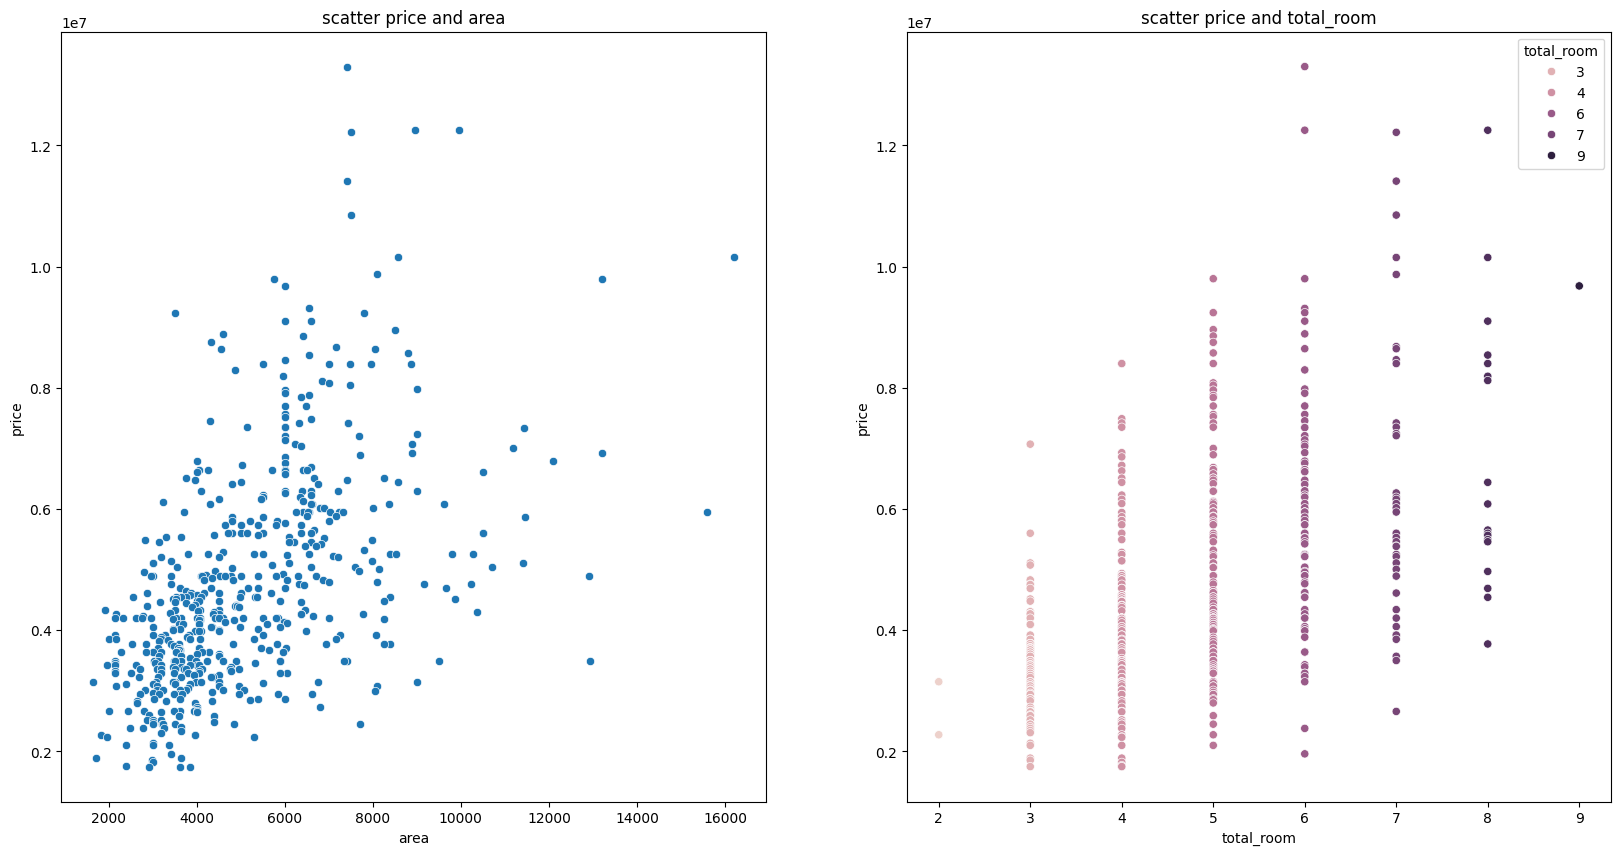

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax = sb.scatterplot(data, x="area", y="price", ax=axes[0])
ax.set_title("scatter price and area")

ax1 = sb.scatterplot(data, x="total_room", y="price", hue="total_room", ax=axes[1])
ax1.set_title("scatter price and total_room")





# Normalize and split

In [83]:
# X and y
price = data["price"]
train = data.drop(["price"], axis= 1)

# Normalize
norm = MinMaxScaler()
#train = norm.fit_transform(train)

# split
x_train, x_val, y_train, y_val = train_test_split(train, price, test_size = 0.3, random_state = 42)


# train and val

In [84]:
xgb = create_xgboost(n_estimators = 100, 
                         max_depth = 6, 
                         learning_rate = 0.1, 
                         subsample = 0.8) 

xgb.fit(x_train, y_train)

pred = xgb.predict(x_val)
print(r2_score(y_val, pred))

0.5976760387420654


In [85]:
rfr = create_rfr(n_estimators = 100, 
                         max_depth = 6, 
                         min_samples_split = 3, 
                         min_samples_leaf = 10) 

rfr.fit(x_train, y_train)

pred = rfr.predict(x_val)
print(r2_score(y_val, pred))

0.5521602378764285
